## 1. Importando módulos e funções
    Por: Rodolpho C. Braga (RCB)                  02 de Novembro de 2018.
         
    

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
#Modeling tools
exec(open('tools/modeling.py').read())
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Descriptors import MolLogP
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.Chem import Descriptors
import sys
import multiprocessing
from standardiser import break_bonds, neutralise, rules, unsalt
from standardiser.utils import StandardiseException, sanity_check
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from sklearn.externals import joblib


import sys
def warn(*args, **kwargs):
    pass  # to suppress sklearn warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn = warn
#Modeling tools
exec(open('tools/modeling.py').read())
from rdkit.Chem.Descriptors import MolLogP
from rdkit.Chem import Descriptors
from tools import tools
from tools import  pipeline as p
from tools import  sar
from sklearn.metrics import cohen_kappa_score
import csv
from rdkit.Chem import MACCSkeys
from sklearn.model_selection import ShuffleSplit
import _pickle as cPickle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
import bz2
from glob import glob
import _pickle as cPickle
import pickle
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split

  * could not import Bokeh, plotting with Highcharts instead.
- no local installation of highcharts found, using web version.
- loading highcharts...


/home/rodolpho/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


* SA scorer not available. RDKit's Contrib dir needs to be in the Python import path...
tools.tools                                   (190829-08:16)
- no local installation of JSME found, using web version.
* SA scorer not available. RDKit's Contrib dir needs to be in the Python import path...
> interactive IPython session.
tools.sar                                     (190829-08:16)


## 2. Entrada dos dados

Escolher a formda da entrada dos dados:
1. SDF
1. CSV

### 2.1 SDF

In [8]:
#Caminho do SDF
file= "data/AOT_.sdf"

sdfInfo = dict(smilesName='SMILES',molColName='ROMol')
moldf = PandasTools.LoadSDF(file,**sdfInfo)
#Rename ROMol
moldf = moldf.rename(columns={'ROMol': 'Mol'})
#duplicatas by smiles
moldf = moldf.drop_duplicates(subset=['SMILES'])
#logP
moldf['logP'] = moldf['Mol'].apply(MolLogP)
#Remove moléculas sem esrtutura no RDKit
moldf = moldf[pd.notnull(moldf['Mol'])]
#Colunas no pandas
moldf.keys()

RDKit ERROR: [08:24:42] Explicit valence for atom # 33 O, 3, is greater than permitted
RDKit ERROR: [08:24:42] ERROR: Could not sanitize molecule ending on line 25648
RDKit ERROR: [08:24:42] ERROR: Explicit valence for atom # 33 O, 3, is greater than permitted
RDKit ERROR: [08:24:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bad dir
RDKit ERROR: Violation occurred on line 1755 in file /opt/conda/conda-bld/rdkit_1561471048963/work/Code/GraphMol/Chirality.cpp
RDKit ERROR: Failed Expression: dir == Bond::ENDUPRIGHT || dir == Bond::ENDDOWNRIGHT
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [08:24:43] Unexpected error hit on line 225233
RDKit ERROR: [08:24:43] ERROR: moving to the begining of the next molecule
RDKit ERROR: [08:24:44] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [08:24:44] ERROR: Could not sanitize molecule ending on line 464658
RDKit ERROR: [08:24:44] ERROR: Explicit valence for atom # 1 O, 3, is greater 

Index(['CASRN', 'DTXSID', 'Name', 'Structure_Source', 'Canonical_QSARr',
       'Salt_Solvent', 'InChI_Code_QSARr', 'InChI Key_QSARr', 'very_toxic',
       'nontoxic', 'StandardizerResult', 'Outcome', 'ID', 'SMILES', 'Mol',
       'GHS_category', 'EPA_category', 'LD50_mgkg', 'logP'],
      dtype='object')

(8477, 5)


,ID,Mol,Name,SMILES,Outcome
0,5894-60-0,,"Silane, trichlorohexadecyl-",CCCCCCCCCCCCCCCC[Si](Cl)(Cl)Cl,1
1,101-20-2,,Triclocarban,O=C(Nc1ccc(Cl)cc1)Nc1ccc(Cl)c(Cl)c1,0
2,112-05-0,,Nonanoic acid,CCCCCCCCC(=O)O,0
3,11077-03-5,,,C=C(C=CCC(O)C(O)C(O)CC=CC=CC(O)CC1OC(CC(O)C(O)CC2OC(C(O)C(O)CCC(O)C=CC(C)C(O)CC3(O)OC(CC(O)CCCCCCCC45CC(C)CC(C)(O4)C(CC(C)CCCCCC(O)C(O)C(O)C(O)C(O)C4OC(CC(O)C(O)C(C)=CC(O)CC(C)C(=O)C(O)N=CCC(=O)NCCCO)C(O)C(O)C4O)O5)C(O)C(O)C3O)CC(O)C2O)C(O)C(O)C1O)CCC(O)C(O)C(O)C(C)CC1OC(C=CC(O)C(O)CC2CC3CC(O2)C(CCC2OC(CN)CC2O)O3)C(O)C(O)C1O,1
4,3385-03-3,,Flunisolide,CC1(C)OC2CC3C4CC(F)C5=CC(=O)C=CC5(C)C4C(O)CC3(C)C2(C(=O)CO)O1,1

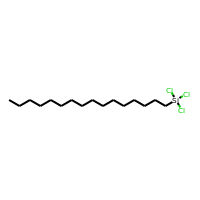
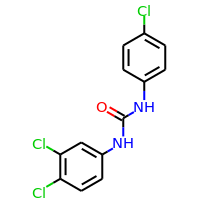
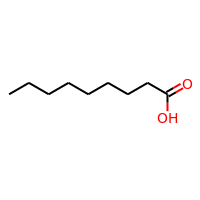
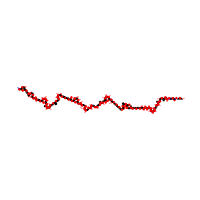
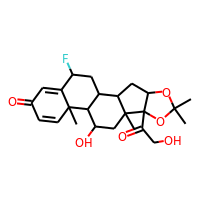

In [9]:
moldf = moldf[['ID','Mol', 'Name','SMILES', 'Outcome']]
moldf = moldf[(moldf['Outcome']== '0')|(moldf['Outcome']== '1')]
print(moldf.shape)
moldf.head()

### 2.2 CSV compactado para GZ

Os dados devem estar compactados para GZ (Reduz 90% do tamanho do arquivo).<br>
Você vai precisar:
1. Windows usar o 7-ZIP para compactar
1. Linux: gzip nomedoarquivo.csv
1. Em geral o encoding utf-8 funciona na maioria dos casos. Se nã uncionar usar o utf-16.

### 3. Definir a coluna a ser usada como variável dependente

In [10]:
moldf = moldf.rename(columns={'Outcome': 'Outcome'})

,ID,Mol,Name,SMILES,Outcome
0,5894-60-0,,"Silane, trichlorohexadecyl-",CCCCCCCCCCCCCCCC[Si](Cl)(Cl)Cl,1

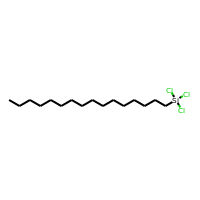

In [11]:
moldf.head(1)

,ID,Mol,Name,SMILES,Outcome,RowID
1834,73573-42-9,,Rescimetol,COC(=O)C1C2CC3c4[nH]c5cc(OC)ccc5c4CCN3CC2CC(OC(=O)C=Cc2ccc(O)c(OC)c2)C1OC,0,1834
7628,123-96-6,,2-Octanol,CCCCCCC(C)O,0,7628
7627,121-88-0,,2-Amino-5-nitrophenol,Nc1ccc([N+](=O)[O-])cc1O,0,7627
7626,112-29-8,,1-Bromodecane,CCCCCCCCCCBr,0,7626
6320,5724-56-1,,"2,3-Dimethylbenzonitrile",Cc1cccc(C#N)c1C,0,6320
6321,58041-19-3,,"1,4-Oxathiin, 2,3-dihydro-5,6-diphenyl-",c1ccc(C2=C(c3ccccc3)SCCO2)cc1,0,6321
6322,5836-23-7,,Tecoram,CN(C)C(=S)SSC(=S)NCCNC(=S)SSC(=S)N(C)C,0,6322
6323,5850-39-5,,C.I. Acid Green 20,Nc1ccc(N=Nc2c(S(=O)(=O)O)cc3c(c2N)C(=O)C(=NNc2ccccc2)C(S(=O)(=O)O)=C3)cc1,0,6323
6324,59721-29-8,,Camostat mesylate,CN(C)C(=O)COC(=O)Cc1ccc(OC(=O)c2ccc(NC(=N)N)cc2)cc1,0,6324
6325,600-14-6,,"2,3-Pentanedione",C=C(O)C(=O)CC,0,6325

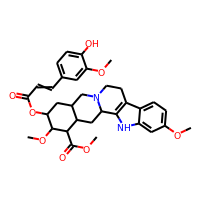
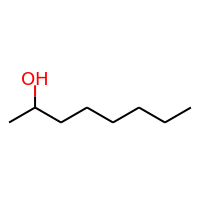
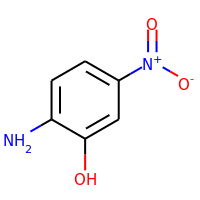
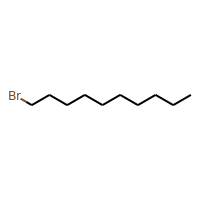
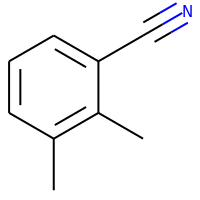
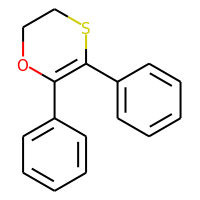
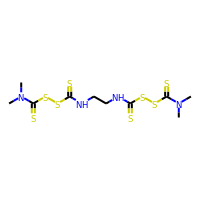
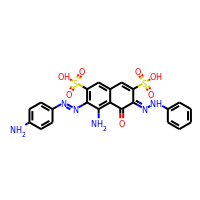
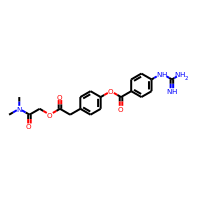
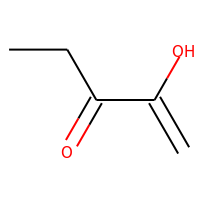
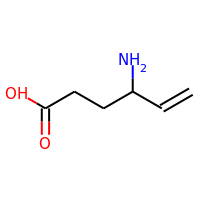
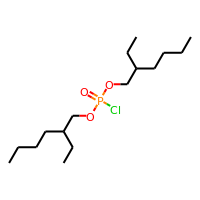
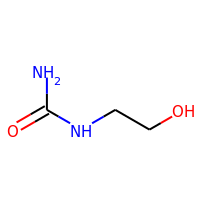
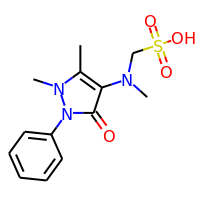
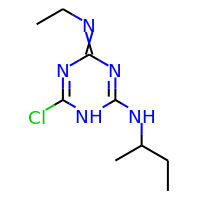
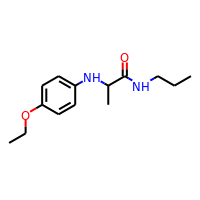
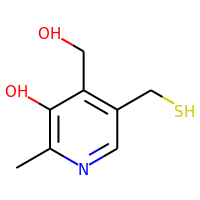
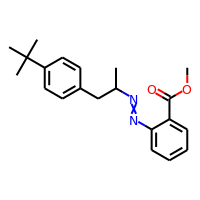
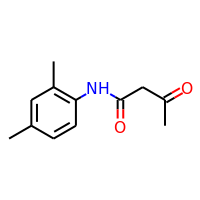
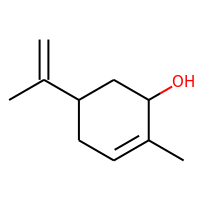
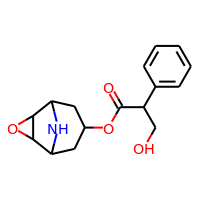
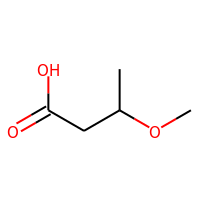
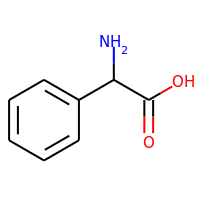
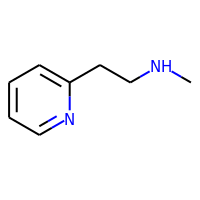
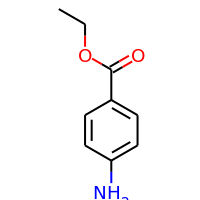
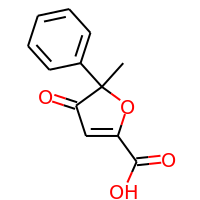
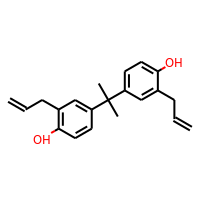
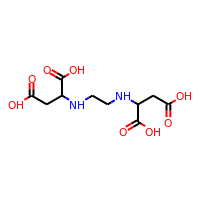
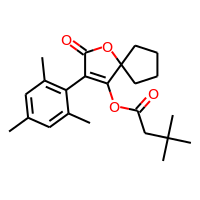
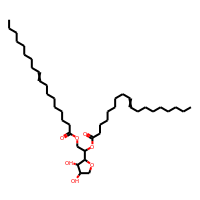
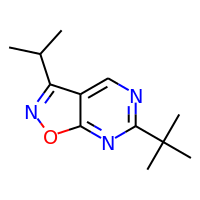
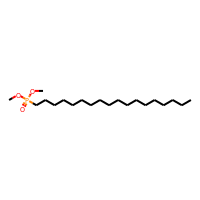
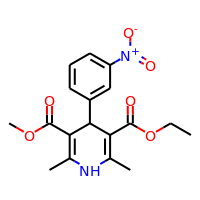
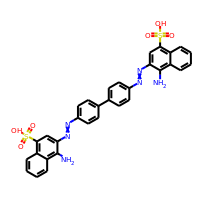
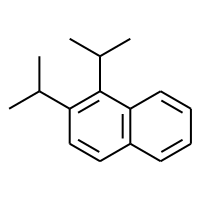
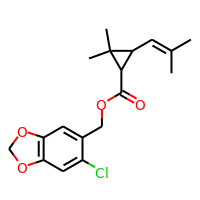
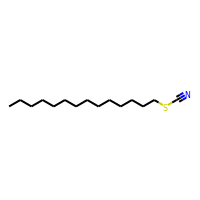
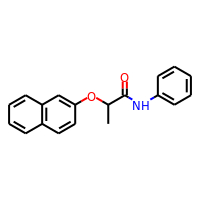
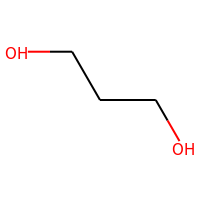
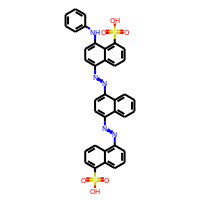
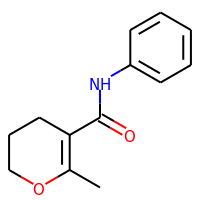
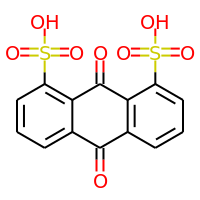
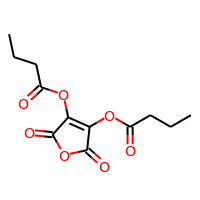
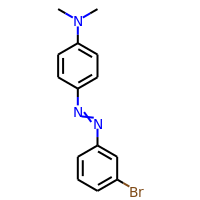
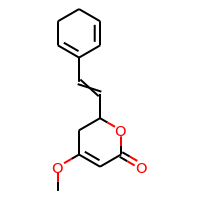
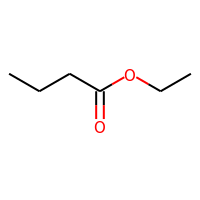
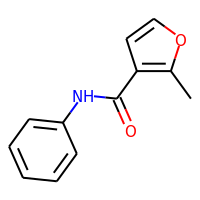
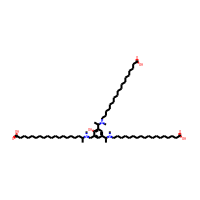
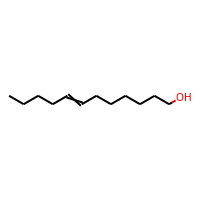
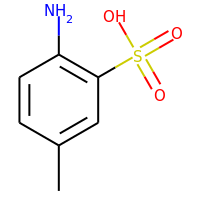
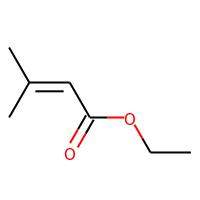
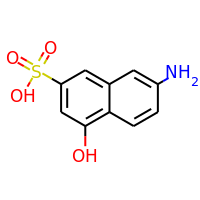
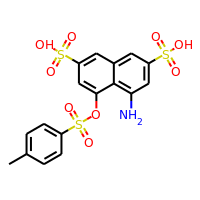
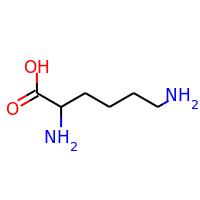
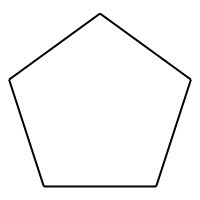
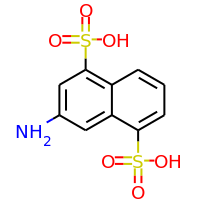
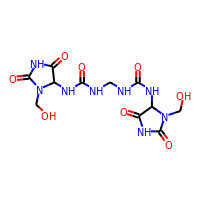
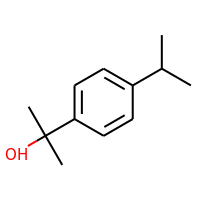
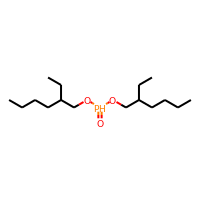
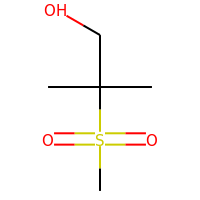

In [12]:
moldf= moldf.sort_values(['Outcome'], ascending=True)
moldf['RowID'] = moldf.index
moldf.head(300)

## 4. Definir a coluna a ser usada como variável dependente

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


outcomes=(np.unique(moldf['Outcome']))
le.fit(list(set(outcomes)))
y = le.transform( moldf['Outcome'] )



print ("Classes                          : ",(outcomes))
print ("Number of cpds in each class     : ",np.unique([len(y[y==smi]) for smi in y]))
print ("Total number of cpds             : ",len(y))

S = moldf['Outcome']
info = {}
for i,cls in enumerate(S.unique()):
    info.update({cls:i})
    S = S.replace(cls,i)

Classes                          :  ['0' '1']
Number of cpds in each class     :  [3658 4819]
Total number of cpds             :  8477


{'0': 0, '1': 1}

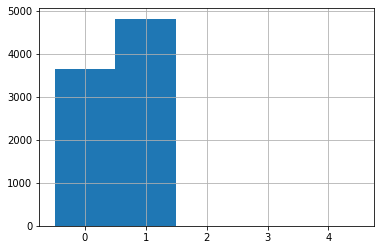

In [14]:
ax = S.hist(bins=np.arange(-0.5,5))
ax.set_xticks(range(0,5))
info

## 5. Descritor e Modelagem

In [15]:
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)
df = calc.pandas(moldf['Mol'])

100%|██████████| 8477/8477 [06:03<00:00, 23.31it/s]  


In [17]:
from fancyimpute import KNN
df_numeric = df.select_dtypes(include=[np.float])

# I now run fancyimpute KNN, 
# it returns a np.array which I store as a pandas dataframe
df_filled = pd.DataFrame(KNN(3).fit_transform(df_numeric))

Imputing row 1/8477 with 0 missing, elapsed time: 272.332
Imputing row 101/8477 with 0 missing, elapsed time: 272.334
Imputing row 201/8477 with 0 missing, elapsed time: 272.335
Imputing row 301/8477 with 0 missing, elapsed time: 272.335
Imputing row 401/8477 with 0 missing, elapsed time: 272.336
Imputing row 501/8477 with 0 missing, elapsed time: 272.337
Imputing row 601/8477 with 0 missing, elapsed time: 272.338
Imputing row 701/8477 with 0 missing, elapsed time: 272.339
Imputing row 801/8477 with 0 missing, elapsed time: 272.339
Imputing row 901/8477 with 0 missing, elapsed time: 272.340
Imputing row 1001/8477 with 0 missing, elapsed time: 272.341
Imputing row 1101/8477 with 0 missing, elapsed time: 272.341
Imputing row 1201/8477 with 0 missing, elapsed time: 272.342
Imputing row 1301/8477 with 0 missing, elapsed time: 272.343
Imputing row 1401/8477 with 0 missing, elapsed time: 272.343
Imputing row 1501/8477 with 0 missing, elapsed time: 272.344
Imputing row 1601/8477 with 0 missin

,ID,Mol,Name,SMILES,Outcome,RowID,Descriptors
1834,73573-42-9,,Rescimetol,COC(=O)C1C2CC3c4[nH]c5cc(OC)ccc5c4CCN3CC2CC(OC(=O)C=Cc2ccc(O)c(OC)c2)C1OC,0,1834,"[2.294906808701784, 1.9690664651023388, 2.386159437514462, 1.2698987829417592, 1.3193025843184985, 2.386159437514462, 1.1339261055730159, 1.9230992974210686, 1.9396976662411562, -1.4929037021191787, 1.884639651299901, -0.012552892839886491, -0.012552893403153704, 2.1682748394604383, 2.406126832682007, 2.157053364805248, 2.1697224066961627, 2.129257152694256, 2.0676967797739985, 2.114645296959058, 2.4656763710150407, 2.066004976936286, 2.3868501381164746, 2.5003148209660417, 2.6486632075857637, 2.759921888530182, 2.798031462815757, 2.7213677541365273, 2.5346930424524703, 2.353864853745876, 2.30753589308733, 0.7771632453690084, 1.955262788723705, 1.9887302481857625, 1.893268986332991, 1.7230336711462118, 2.0527072088419316, 1.9148436298551879, 1.9057410794094216, 1.845762694503125, 0.5571482196434707, 1.9105201937383962, 1.8774020112914722, 1.707265603843496, 1.3844921809550534, 1.9006914957860317, 1.7778794187557247, 1.81309216411965, 1.7821290269887713, 2.164694500443834, 2.259526598852011, 2.40126080050528, 2.5245628227203083, 2.596358782630929, 2.4679614531025202, 2.286103582422821, 2.147296253795115, 2.1110905341886683, 2.046409395739956, 2.1607298460530453, 2.209805004688854, 2.0893246842869098, 2.3232462721920863, 2.493466798136641, 2.3114435619896856, 2.0645145772107822, 1.9317895082515082, 2.0663454295153767, 2.181150665965621, 2.23505057138711, 2.133893933117449, 2.360471194190431, 2.497044304978257, 2.314924750823931, 2.0772895539002256, 1.9418137734126917, 2.0670045907622168, 2.182692379899314, 2.2374632084738644, 2.126245263721525, 2.354469167139622, 2.497146250936032, 2.3173043519077523, 2.0787691946867253, 1.94003707027855, 1.891387090550297, 2.093804195949424, 2.201580500388814, 2.3483390436188682, 2.4707934475696156, 2.409488023789755, 2.2107466604901167, 2.0775823365996247, 2.0114619741286375, 1.9464424040705923, 2.0838698863997536, 2.0981565343109527, 1.9376356015306582, 2.191424019755058, 2.4561479592725846, ...]"
7628,123-96-6,,2-Octanol,CCCCCCC(C)O,0,7628,"[-0.9105054620840783, -0.9588597275528435, -0.8841061800237037, -1.780137570157658, -1.7769881106341672, -0.8841061800237037, -0.9050601030456471, -1.2660704369974136, -1.1144945839704696, 1.096788405961482, -1.1710411003537462, -0.012552892842219781, -0.012552893412994216, -1.0765676816706553, -1.0986713880457672, -1.0966804014266422, -0.9381857559147768, -0.8165561644857962, -0.6834937620311484, -0.6009161228496797, -0.4942156440576996, -0.4099442627327484, -0.8297172014884129, -0.8098803817151279, -0.7383964122013852, -0.6813398887143917, -0.63895315218174, -0.5946962899529808, -0.5554647952403637, -0.5042073319468393, -0.47752226721467805, -0.723743902729751, -0.9571895074113436, -1.0007468006711666, -0.9011196377248787, -0.7580221482362585, -0.7514754517056693, -0.6522346125150595, -0.5521024154137838, -0.4902741935221125, -0.6143759657057519, -1.0094221044588443, -1.042230359963348, -0.8969572236090882, -0.6822756736088365, -0.7526708814903367, -0.6512560760156691, -0.5415612557045143, -0.48404935976593144, -0.7740935526108611, -0.7047599982845699, -0.7374167255288002, -0.7397107262881689, -0.7107846185411745, -0.6532096514336535, -0.5950617876319687, -0.534846827696511, -0.4916129201369944, -0.48574060622774573, -0.5021243884141595, -0.43099673766309887, -0.3271471437718929, -0.44663933800411726, -0.47800548110447055, -0.46776680592362546, -0.4483278659526119, -0.4213140517457277, -0.532810243460865, -0.5269632506901114, -0.4701600264124951, -0.3748906341906862, -0.4822579705776384, -0.5007654918394999, -0.483109788445542, -0.4574661600309212, -0.4258451723496665, -0.526182798702953, -0.5234760138024058, -0.46759980177735205, -0.36654792372297146, -0.4778550639093092, -0.49747856105800586, -0.47995181819741517, -0.4544427585412522, -0.42273205145985937, -0.756596521614206, -0.6504636707934962, -
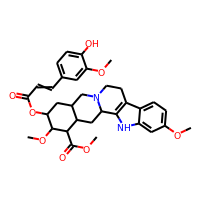
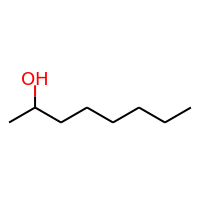
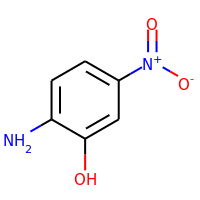
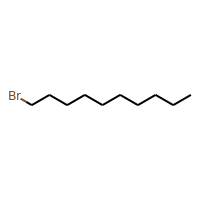
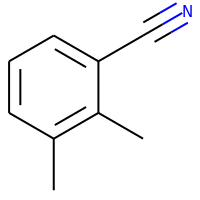

In [29]:
y= np.int32((S))
X = np.array(df_filled)
scaler = StandardScaler()
x=  scaler.fit_transform(X)
moldf['Descriptors'] = x.tolist()
moldf.head()


In [20]:
%%time
############################################## Random Forest ##################################################
paramgrid = {"max_features": [x.shape[1] , x.shape[1] // 2,  x.shape[1] // 4,  x.shape[1] // 12,  x.shape[1] // 10, x.shape[1] // 7, x.shape[1] // 5, x.shape[1] // 3 ],
             "n_estimators": [ 10, 100, 300, 500], }


from sklearn.model_selection import RepeatedKFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV


ncores=48
verbose=1
seed = 24

np.random.seed(seed)

# Kappa Scorer 
kappa_scorer = metrics.make_scorer(quadratic_weighted_kappa, greater_is_better = True)



model = EvolutionaryAlgorithmSearchCV(estimator=RF(class_weight=None),
                                   params=paramgrid,
                                   scoring=kappa_scorer,
                                   cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=seed),
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   iid=True,
                                   refit=True,
                                   n_jobs=ncores)

model.fit(x, y)

# Get best model
best_model = model.best_estimator_

# Fit model with best parameters optimized for quadratic_weighted_kappa
best_model.fit(x,y)


Types [1, 1] and maxint [7, 3] detected
--- Evolve in 32 possible combinations ---
gen	nevals	avg     	min     	max     	std      
0  	50    	0.524994	0.466664	0.550339	0.0295223
1  	30    	0.544998	0.534466	0.550339	0.00384826
2  	32    	0.546275	0.53882 	0.55247 	0.00253123
3  	31    	0.546891	0.542144	0.55247 	0.0025942 
4  	28    	0.545822	0.471082	0.55247 	0.0109197 
5  	32    	0.54714 	0.54001 	0.55247 	0.00296982
Best individual is: {'max_features': 372, 'n_estimators': 300}
with fitness: 0.5524700751174328
CPU times: user 22min 13s, sys: 1min 42s, total: 23min 56s
Wall time: 12h 26min 18s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=372, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
a=best_model.predict(X)

In [24]:
np.unique(a)


array([0, 1], dtype=int32)

In [25]:
np.unique(y)


array([0, 1], dtype=int32)

## 6. Avaliação Externa e Parametros Estatísticos

### 6.1 5-Fold Externo com todos os dados

k-nearest neighbour distance defined to the AD      :  20
AD Similarity limit      :  0.977144822682102


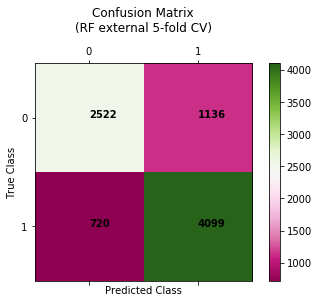

########################################
#   Unbalanced Statistical Parameters  #
########################################
Accuracy: 0.78
Area under the Curve (AUC): 0.77
########################################
#   Balanced Statistical Parameters    #
########################################
Correct Classification Rate (CCR): 0.77
Weighted Kappa:  0.55
########################################
#            Positive Class            #
########################################
Sensitivity (Se): 0.85
Positive Predictive Value (PPV): 0.78
########################################
#            Negative Class            #
########################################
Specificity (Sp): 0.69
Negative Predictive Value (NPV): 0.78
########################################
#     Other Statistical Parameters     #
########################################
Precision:  0.78
Recall:  0.85
F1:  0.82
########################################
#        Applicability Domain          #
##############################

In [41]:
#k=int(round(pow((len(y)) ,1.0/3), 0))
ypreds_folds_total_final,index_test_folds_final, training_labels_AD_final_conc,training_labels_pred_AD_final_conc, y_obs_folds, test_index_ad_final_conc, Dc,index_train_folds, index_test_folds, ypreds_folds, yproba_folds, k  = AD_scikitlearn(x,X,y,20,seed, best_model)
run_statistics(y_obs_folds, ypreds_folds_total_final, label="RF external 5-fold CV", coverage=100)

### 6.2 5-Fold Externo somente com os dados no AD

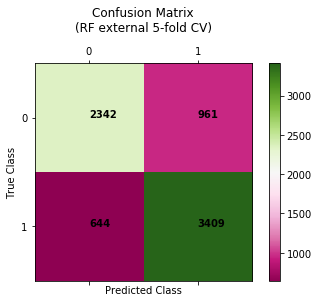

########################################
#   Unbalanced Statistical Parameters  #
########################################
Accuracy: 0.78
Area under the Curve (AUC): 0.78
########################################
#   Balanced Statistical Parameters    #
########################################
Correct Classification Rate (CCR): 0.77
Weighted Kappa:  0.56
########################################
#            Positive Class            #
########################################
Sensitivity (Se): 0.84
Positive Predictive Value (PPV): 0.78
########################################
#            Negative Class            #
########################################
Specificity (Sp): 0.71
Negative Predictive Value (NPV): 0.78
########################################
#     Other Statistical Parameters     #
########################################
Precision:  0.78
Recall:  0.84
F1:  0.81
########################################
#        Applicability Domain          #
##############################

In [42]:
coverage=(((len(training_labels_AD_final_conc))*100)/(float(len(index_test_folds_final)*100))*100)
run_statistics(training_labels_AD_final_conc, training_labels_pred_AD_final_conc, label="RF external 5-fold CV", coverage=coverage)

# 7. Preparar os dados para salvar

### Atributos:

* molecules:
     `pandas.DataFrame()` com os descritores moleculares para o dataset* (usado na `similarity_table()`)
* descriptor:
    *`dict()` com informações do descritor utilizado (usado na `similarity_table()`)
        * function: função de calcular o descritor
        * info: `dict()` com os argumentos de entrada da função
        * name: nome do descritor
* models:
    * `list()` de `dict()` com os dados dos modelos:
        * model: modelo de predição do `scikit-learn`
        * name: nome do modelo
        * longname: descrição curta do modelo
        * descriptor: `dict()` com informações do descritor utilizado
            * function: função de calcular o descritor
            * info: `dict()` com os argumentos de entrada da função
            * name: nome do descritor
         fpDF: `pandas.DataFrame()` com os descritores moleculares para o dataset*
        * dataset: `pandas.DataFrame()` com as informações moleculares de validação do modelo
         applM: distribuição de similaridade do k*-vizinho mais próximo calculada para toda dataset
        * k: ordinal do vizinho mais próximo calculado para o dataset
        * dda: limite estabelecido para que a molécula esteja no domínio de aplicabilidade do modelo

### Métodos:

* `model_table()`:
    * Gera a tabela (`pandas.DataFrame()`) de resultados dos modelos
* `AD_table()`:
    * Gera a tabela (`pandas.DataFrame()`) de domínio de aplicabilidade dos modelos
* `similarity_table`:
    * Gera a tabela (`pandas.DataFrame()`) dos mapas de similaridade das `n` moléculas mais próximas.
    * Gera dados de similaridade que serão usados pela função `similarity_statistics()`
    
##  7.1 Gerando a tabela de dados com todas predições para cada fold

In [43]:
#Get all external Folds and save in Excel format

all_ext_Folds = pd.DataFrame()
for foldnum in range(1,5+1):
    for rep in range(1,5+1):
        final_frame = (len(moldf)-1) 
        fold_N= index_test_folds[foldnum-1]
        pred_N= ypreds_folds[foldnum-1]
        proba_N = yproba_folds[foldnum-1]
        
        tab = moldf.iloc[fold_N,:]
        tab['Prediction'] = pred_N
        tab['Confiability'] = proba_N
        tab['Fold'] = 'Fold {:d} extenal Repetition {:d}'.format(foldnum,rep)

        all_ext_Folds = all_ext_Folds.append(tab).reset_index(drop=True)


cols = ['ROMol','SMILES','Outcome','Prediction','Fold']

### melhorar ##
dX = dict()
[dX.update({i:[val]}) for i,val in enumerate(X)]
dfX = pd.DataFrame.from_dict(dX).T
dfX.columns=['FingerPrint']
dfX['SMILES'] = moldf['SMILES']

#########################

Dict_AD = {}
Dict_AD["FingerPrint"] = dfX
Dict_AD["Folds"] = all_ext_Folds
Dict_AD["k"] = k
Dict_AD["AD.distance.limit"] = Dc.mean()
Dict_AD["distance_AD"] = np.asarray(getNeighborsDitance(X, X, k))
Folds_true= Dict_AD["Folds"]
Folds_true = Folds_true.drop('Descriptors', 1)


###  7.1.1 Mostrando a tabela de dados com todas predições para cada fold (last one)

,ID,Mol,Name,SMILES,Outcome,RowID,Prediction,Confiability,Fold
0,5850-39-5,,C.I. Acid Green 20,Nc1ccc(N=Nc2c(S(=O)(=O)O)cc3c(c2N)C(=O)C(=NNc2ccccc2)C(S(=O)(=O)O)=C3)cc1,0,6323,0,98.000000,Fold 1 extenal Repetition 1
1,41407-89-0,,,NC(C(=O)O)c1ccccc1,0,6338,1,59.000000,Fold 1 extenal Repetition 1
2,54856-23-4,,Betahistine mesylate,CNCCc1ccccn1,0,6339,1,89.333333,Fold 1 extenal Repetition 1
3,94-09-7,,Benzocaine,CCOC(=O)c1ccc(N)cc1,0,6340,0,59.333333,Fold 1 extenal Repetition 1
4,283594-90-1,,Spiromesifen,Cc1cc(C)c(C2=C(OC(=O)CC(C)(C)C)C3(CCCC3)OC2=O)c(C)c1,0,7632,0,60.666667,Fold 1 extenal Repetition 1

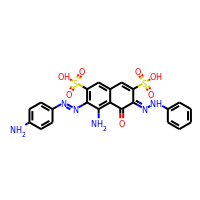
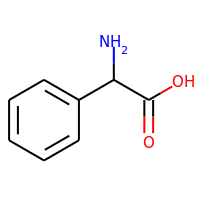
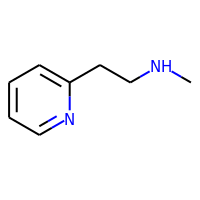
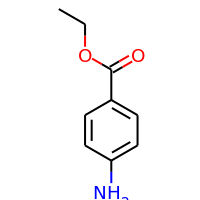
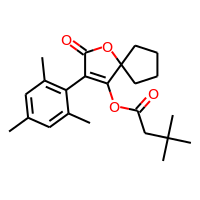

In [44]:
Folds_true.head()

In [45]:

newKeys = {'FingerPrint':'fpDF', 'Folds':'molDF',
        'k':'k', 'AD.distance.limit':'dda',
        'distance_AD':'applM'}

    # Renomeando as chaves
Dict_AD = {newKeys[key]:value for key,value in Dict_AD.items()}
    # Filtrando a tabela
Dict_AD['molDF'] = filter_table(Dict_AD['molDF'])

Dict_AD['molDF']['mol'] = list(map(Chem.MolFromSmiles,Dict_AD['molDF'].index))


##  7.2 Definir as categorias (resultado médias dos folds por molécula)

,Outcome,Prediction,Confiability,mol
SMILES,,,,
B12B3B4B1C234,0,Toxic,52.666667,
BrC(Br)(Br)c1ccc2ccccc2n1,0,Non-Toxic,50.666667,
BrC(Br)Br,1,Toxic,88.333333,
BrC(Br)C(Br)Br,1,Toxic,75.000000,
BrC1(Br)C2CCC1CC2,1,Non-Toxic,56.000000,

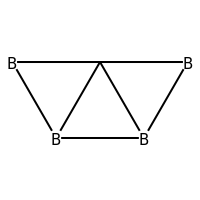
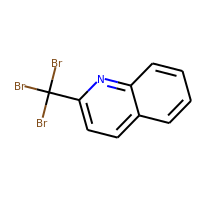
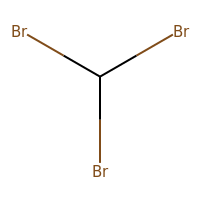
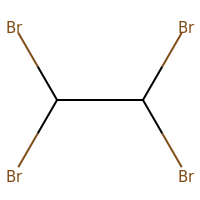
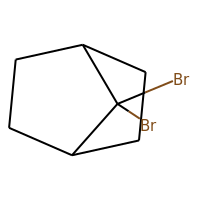

In [46]:
Dict_AD['molDF']['Prediction']=np.where(Dict_AD['molDF']['Prediction']>=0.6, 'Toxic', 'Non-Toxic')
Dict_AD['molDF'].head()

##  7.3 Mostras a distribuição da similaridade dos dados  AD

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 4.430e+02, 8.028e+03]),
 array([0.73092369, 0.75767459, 0.78442548, 0.81117637, 0.83792726,
        0.86467815, 0.89142904, 0.91817993, 0.94493082, 0.97168171,
        0.9984326 ]),
 <a list of 10 Patch objects>)

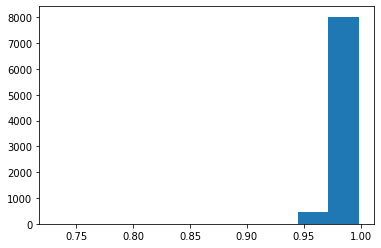

In [47]:
import matplotlib.pyplot as plt
plt.hist(Dict_AD['applM'])

#  8. Salvando modelo e os dados adicionais

In [48]:
from sklearn.externals import joblib
joblib.dump(best_model, 'model/Modelo_acute_oral_mordred.pkl',compress=9)

['model/Modelo_acute_oral_mordred.pkl']

In [49]:
import bz2
import pickle
import _pickle as cPickle
with bz2.BZ2File('model/Dados_adicionais_acute_oral_mordred.pbz2', 'w') as f:
    pickle.dump(Dict_AD, f)
    